In [1]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

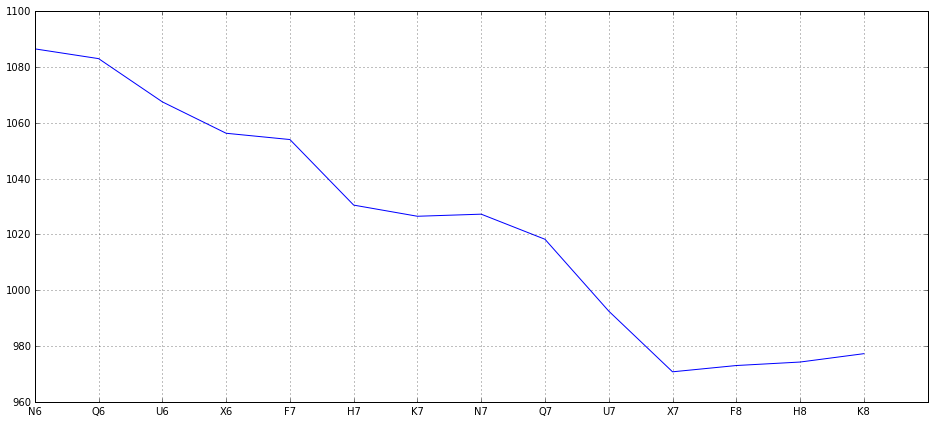

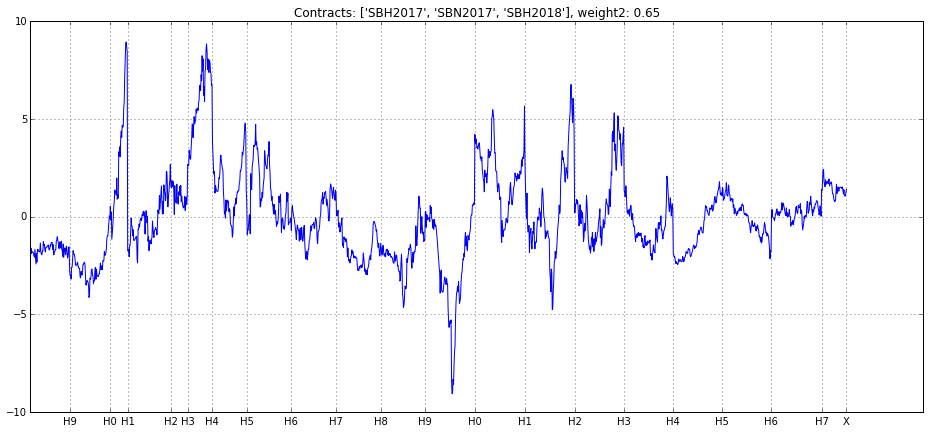

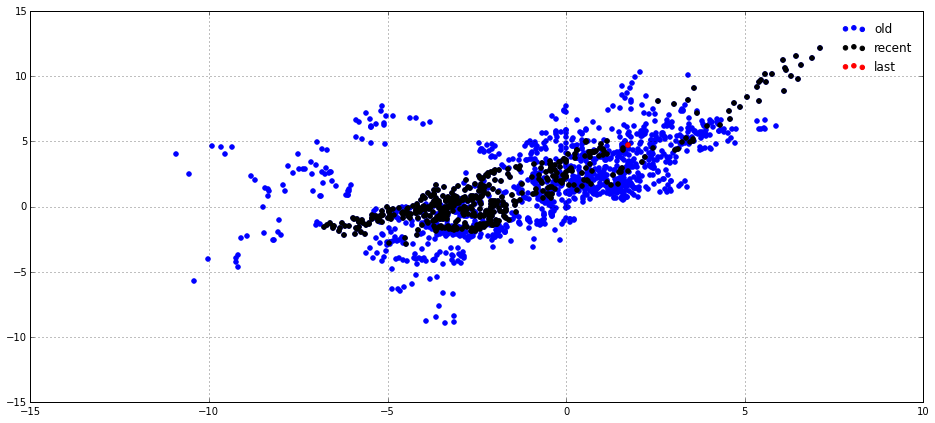

In [3]:

%matplotlib inline
import futures_charts.futures_curve as fc
fc.get_futures_curve_chart_4date(ticker_head='S',settle_date=report_date,tr_dte_limit=600)  # 600

no = 86

#aggregation_method, contracts_back
bf_signals_output = fc.get_butterfly_panel_plot(report_date=report_date,id=no)   # 315 so much to clean!!!
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=no)





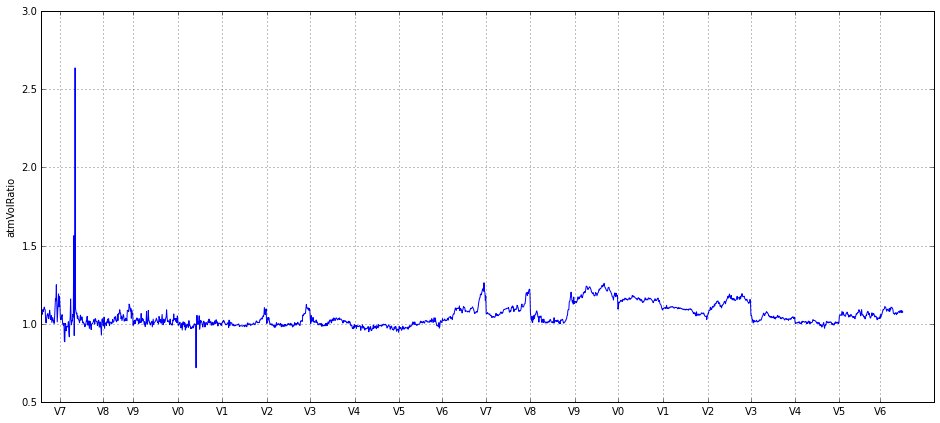

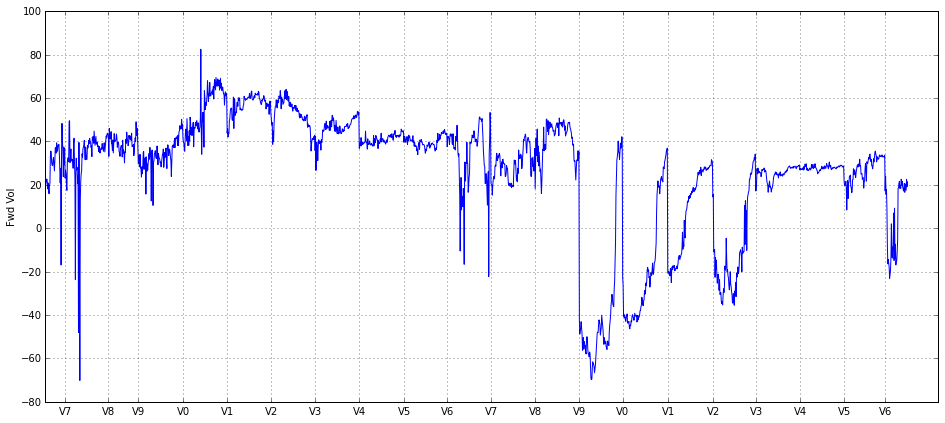

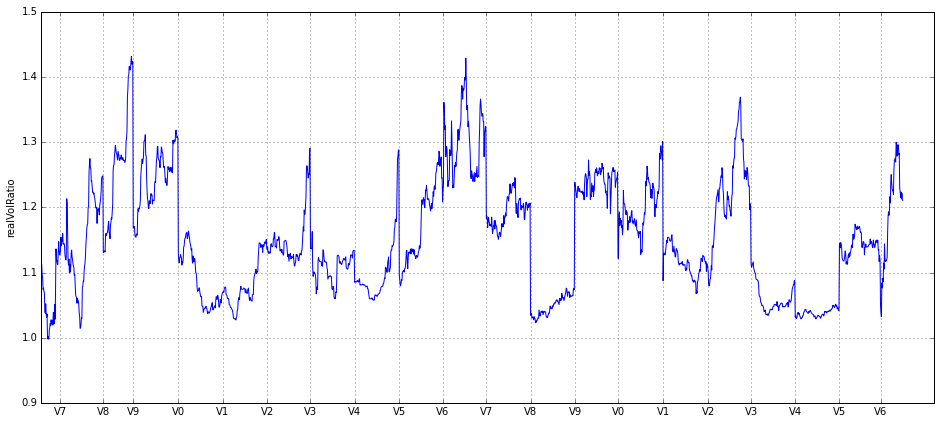

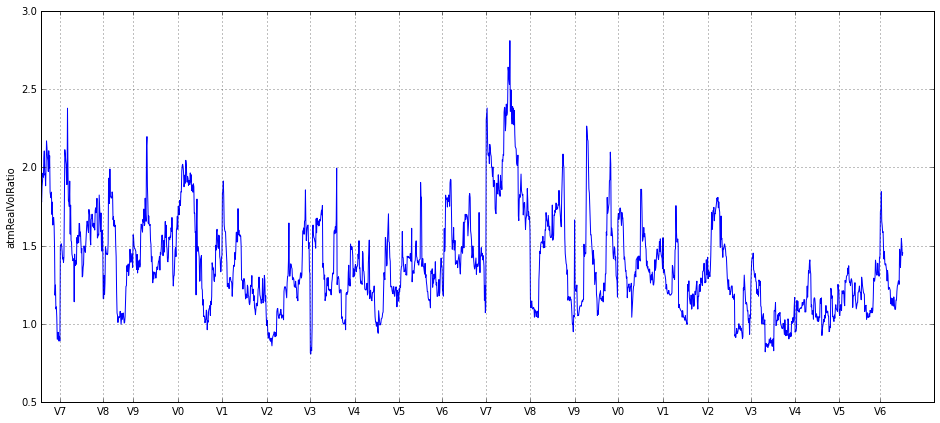

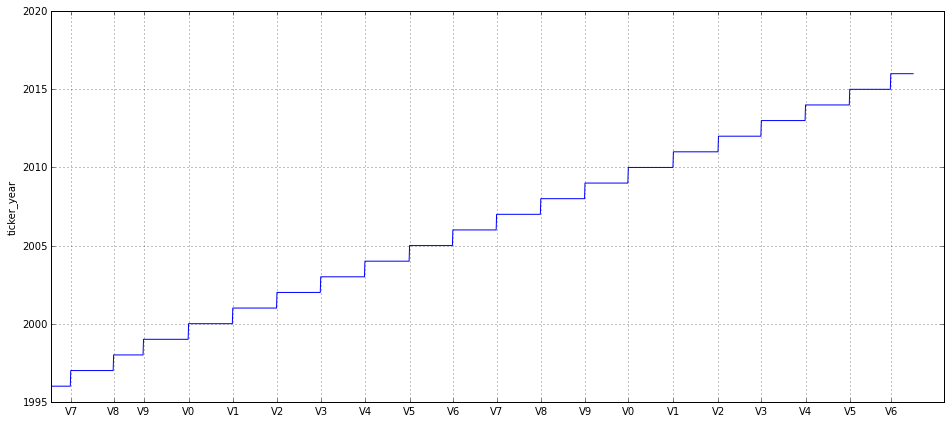

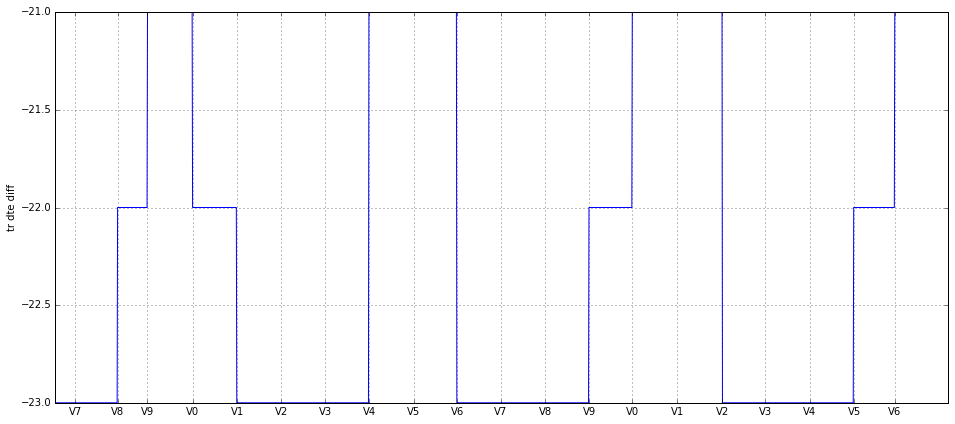

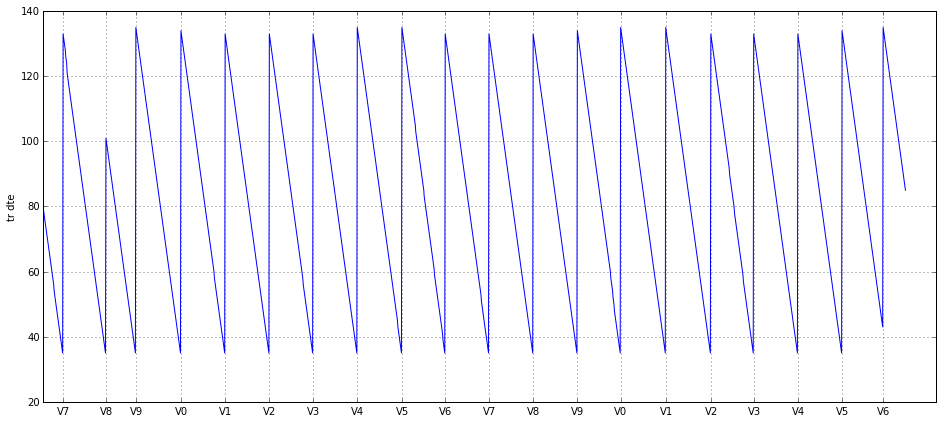

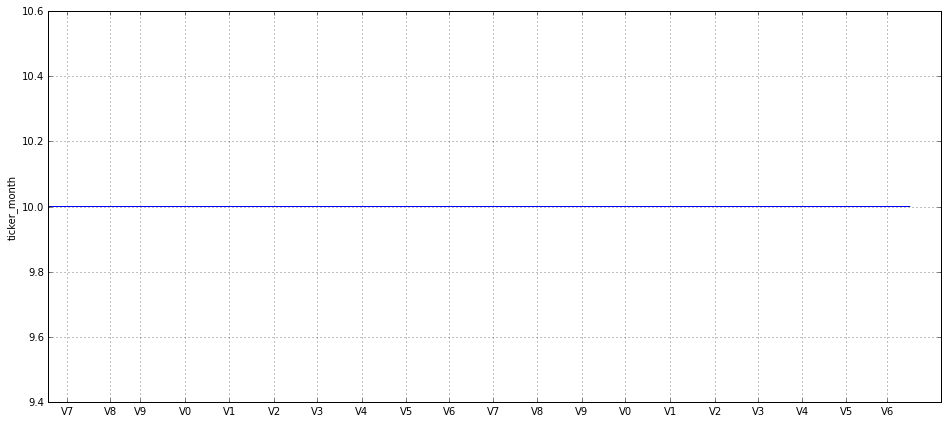

In [6]:
import futures_charts.options_curve as ocr
%matplotlib inline
ocr.get_vcs_panel_plot(ticker_list=['NGV2016','NGX2016'],report_date = 20160526,diagnostics_q=True)

In [1]:
import get_price.presave_price as psp
psp.generate_and_update_futures_data_file_4tickerhead(ticker_head='HO')

In [26]:
import pandas as pd
import numpy as np
import get_price.presave_price as psp
dirty_data_points = psp.dirty_data_points
data4_tickerhead = pd.merge(data4_tickerhead, dirty_data_points, on=['settle_date', 'ticker'],how='left')
data4_tickerhead_filtered = data4_tickerhead[data4_tickerhead['discard'] !=True]

In [29]:
data4_tickerhead_filtered[(data4_tickerhead_filtered['settle_date']==dirty_data_points['settle_date'][0])&
                 (data4_tickerhead_filtered['ticker']==dirty_data_points['ticker'][0])]

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,discard


In [18]:
data4_tickerhead

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,discard
0,1983-03-30,CLM1983,CL,6,1983,51,36,29.4000,949,NaN
1,1983-03-30,CLN1983,CL,7,1983,83,57,29.3500,471,NaN
2,1983-03-30,CLQ1983,CL,8,1983,112,77,29.2000,216,NaN
3,1983-03-30,CLU1983,CL,9,1983,145,100,28.9500,160,NaN
4,1983-03-30,CLV1983,CL,10,1983,174,120,28.9500,18,NaN
5,1983-03-30,CLX1983,CL,11,1983,204,142,28.9000,32,NaN
6,1983-03-30,CLZ1983,CL,12,1983,236,164,28.7500,38,NaN
7,1983-03-31,CLM1983,CL,6,1983,50,35,29.2900,521,NaN
8,1983-03-31,CLN1983,CL,7,1983,82,56,29.2400,399,NaN
9,1983-03-31,CLQ1983,CL,8,1983,111,76,29.0500,300,NaN
